# PART 1

In [20]:
import pandas as pd
import os
import requests
import re
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore')

## (1): Download Twitter data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/suneman/socialgraphs2018/master/files/data_twitter/H115_tw.csv")
twitter_names = list(df.tw_name)

## (2): Build the network of retweets. 

In [3]:
def get_tweets(account_name):
    base_url = "https://raw.githubusercontent.com/thomasnilsson/02805-dataset/master/tweets/"
    url = base_url + account_name
    req = requests.get(url)
    return req.text

In [4]:
def get_retweet_counts():
    retweets = dict()
    rt_pattern = r'RT @(\w+)'
    for tn in twitter_names:
        ts = get_tweets(tn)
        handles = re.findall(rt_pattern, ts)
        handles = [h for h in handles if h in twitter_names]
        retweets[tn] = {h: handles.count(h) for h in handles}
    return retweets

In [5]:
file = open("retweets.obj",'rb')
retweets = pickle.load(file)
file.close()

In [6]:
# A politcian class for storing data in a neat way.
class Politician:
    def __init__(self, df_row):
        key = df_row.tw_name.keys()[0]
        self.TwitterName = df_row.tw_name[key]
        self.Party = df_row.Party[key]
    
    def to_string(self):
        return "TwitterName: %s, Party: %s" % (self.TwitterName, self.Party)
    
    def __hash__(self):
        return hash(self.TwitterName)
    
    def __eq__(self, other):
        return (
                self.__class__ == other.__class__ and 
                self.TwitterName == other.TwitterName
               )

In [7]:
file = open("DG.obj",'rb')
DG = pickle.load(file)
file.close()

## (3): Visualize the network of retweets and investigate differences between the parties.

In [13]:
# Converts degree dictionary to numpy array
def degree_array(G, direction="none"):
    if direction == "in":
        return dict_to_values_array(G.in_degree())
    elif direction == "out":
        return dict_to_values_array(G.out_degree())
    else:
        return dict_to_values_array(G.degree())
    
def dict_to_values_array(D):
    return np.array(list(D.values()))

In [14]:
UG = DG.to_undirected()
politicians = UG.nodes()
degrees = 2 * np.array(degree_array(UG))
color_map = []
for p in politicians:
    if p.Party == "Republican": 
        color_map.append("red")
    elif p.Party == "Democratic": 
        color_map.append("blue")
    else: 
        color_map.append("black")

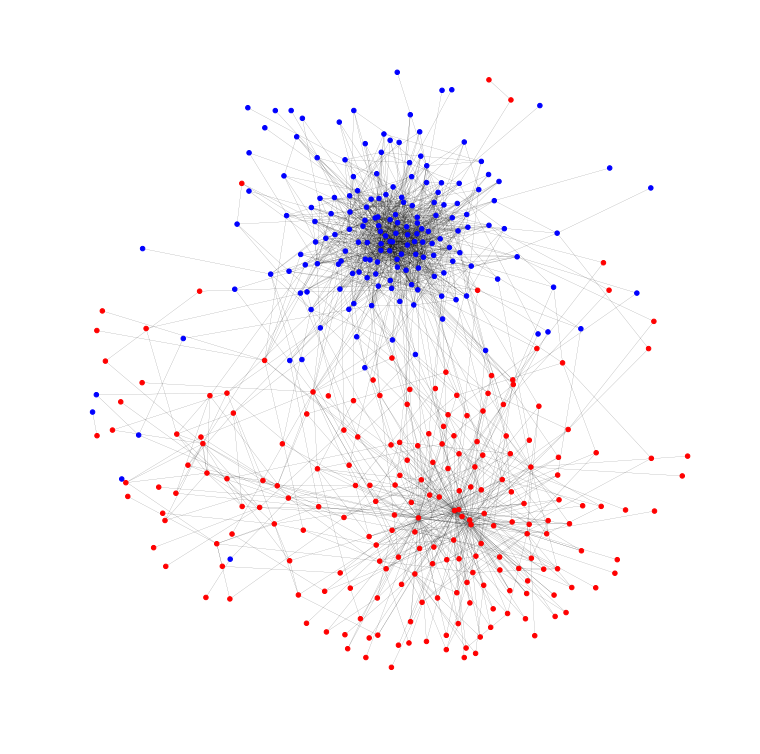

In [21]:
plt.figure(figsize=(10,10))
nx.draw(UG, node_color=color_map, node_size=20, width=0.1)
plt.show()